# **Chapter 7**
_Replicate at least 3_

## **Gradient Descent**

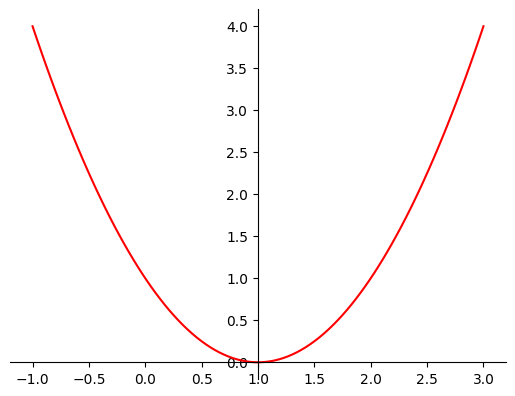

Number of iterations =  1 
Actual value of x  is =  2.96
Number of iterations =  2 
Actual value of x  is =  2.9208
Number of iterations =  3 
Actual value of x  is =  2.882384
Number of iterations =  4 
Actual value of x  is =  2.84473632
Number of iterations =  5 
Actual value of x  is =  2.8078415936
Number of iterations =  6 
Actual value of x  is =  2.7716847617280003
Number of iterations =  7 
Actual value of x  is =  2.7362510664934403
Number of iterations =  8 
Actual value of x  is =  2.7015260451635714
Number of iterations =  9 
Actual value of x  is =  2.6674955242603
Number of iterations =  10 
Actual value of x  is =  2.6341456137750936
Number of iterations =  11 
Actual value of x  is =  2.601462701499592
Number of iterations =  12 
Actual value of x  is =  2.5694334474696
Number of iterations =  13 
Actual value of x  is =  2.538044778520208
Number of iterations =  14 
Actual value of x  is =  2.507283882949804
Number of iterations =  15 
Actual value of x  is =  2.47713

In [1]:
#Import important libraries
import numpy as np
import matplotlib.pyplot as plt

#Define Function
x = np.linspace(-1, 3, 100)
y = x**2-2*x+1

#Display in Graph
fig = plt.figure()
axdef = fig.add_subplot(1, 1, 1)
axdef.spines['left'].set_position('center')
axdef.spines['bottom'].set_position('zero')
axdef.spines['right'].set_color('none')
axdef.spines['top'].set_color('none')
axdef.xaxis.set_ticks_position('bottom')
axdef.yaxis.set_ticks_position('left')
plt.plot(x,y, 'r')
plt.show()

#Define gradiant function
Gradf = lambda x: 2*x-2

#Initial Set of Variables
actual_X  = 3 
learning_rate  = 0.01 
precision_value = 0.000001 
previous_step_size = 1 
max_iteration = 10000 
iteration_counter = 0 

#Iteration Procedure
while previous_step_size  > precision_value  and iteration_counter  < max_iteration : 
    PreviousX = actual_X 
    actual_X  = actual_X  - learning_rate  * Gradf(PreviousX) 
    previous_step_size  = abs(actual_X  - PreviousX) 
    iteration_counter  = iteration_counter +1 
    print("Number of iterations = ",iteration_counter ,"\nActual value of x  is = ",actual_X )

#Print Final Results
print("X value of f(x) minimum = ", actual_X )

## **Newton Raphson**

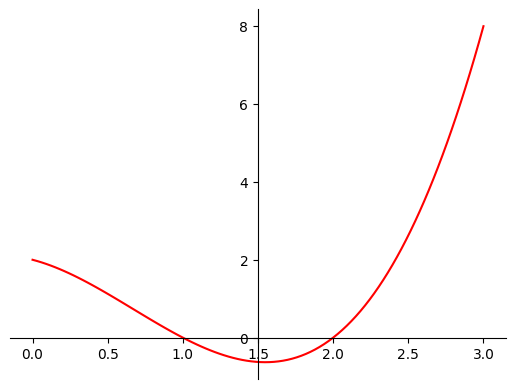

Value of x at the minimum of the function 1.5454545454545454
Number of iterations =  1 
Actual value of x  is =  2.0
Number of iterations =  2 
Actual value of x  is =  1.625
Number of iterations =  3 
Actual value of x  is =  1.5516304347826086
Number of iterations =  4 
Actual value of x  is =  1.5485890147300967
Number of iterations =  5 
Actual value of x  is =  1.5485837703704566
Number of iterations =  6 
Actual value of x  is =  1.5485837703548635
X value of f(x) minimum =  1.5485837703548635


In [2]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt

#Define Functions
x = np.linspace(0,3,100)
y=x**3 -2*x**2 -x + 2

#Display Graph
fig = plt.figure()
axdef = fig.add_subplot(1, 1, 1)
axdef.spines['left'].set_position('center')
axdef.spines['bottom'].set_position('zero')
axdef.spines['right'].set_color('none')
axdef.spines['top'].set_color('none')
axdef.xaxis.set_ticks_position('bottom')
axdef.yaxis.set_ticks_position('left')
plt.plot(x,y, 'r')
plt.show()
print('Value of x at the minimum of the function', x[np.argmin(y)])

#Define First and Second Derivative
FirstDerivative = lambda x: 3*x**2-4*x -1 
SecondDerivative = lambda x: 6*x-4  

#Initial Parameters 
ActualX = 3 
PrecisionValue = 0.000001 
PreviousStepSize = 1 
MaxIteration = 10000 
IterationCounter = 0 

#Newton-Raphson Method
while PreviousStepSize > PrecisionValue and IterationCounter < MaxIteration:
    PreviousX = ActualX
    ActualX = ActualX - FirstDerivative(PreviousX)/ SecondDerivative(PreviousX)
    PreviousStepSize = abs(ActualX - PreviousX) 
    IterationCounter = IterationCounter+1 
    print("Number of iterations = ",IterationCounter,"\nActual value of x  is = ",ActualX) 

#Print Result
print("X value of f(x) minimum = ", ActualX)

## **Gaussian Mixtures**

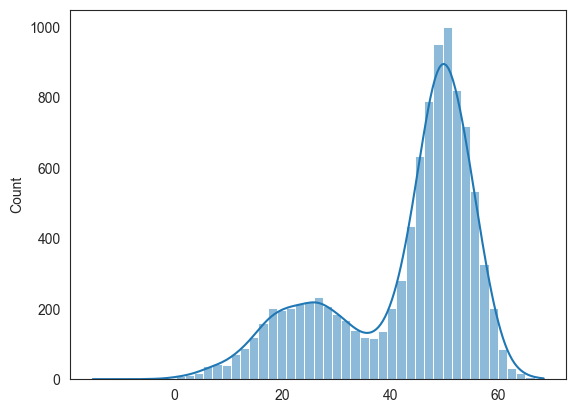

Initial distribution means = (25, 50)
Initial distribution standard deviation = (9, 5)
GM_model distribution means = [[24.14459539]
 [49.9621133 ]]
GM_model distribution standard deviation = [[[8.59827167]]

 [[5.03213425]]]


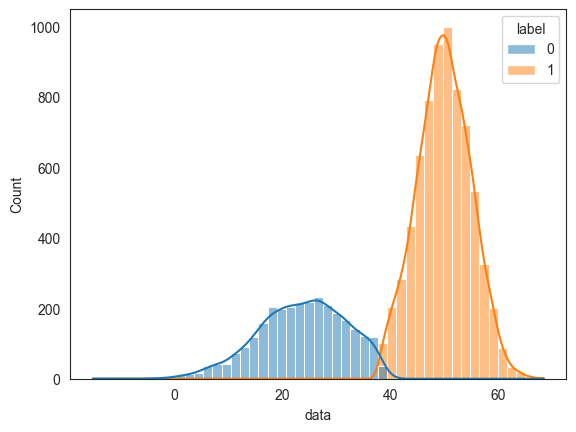

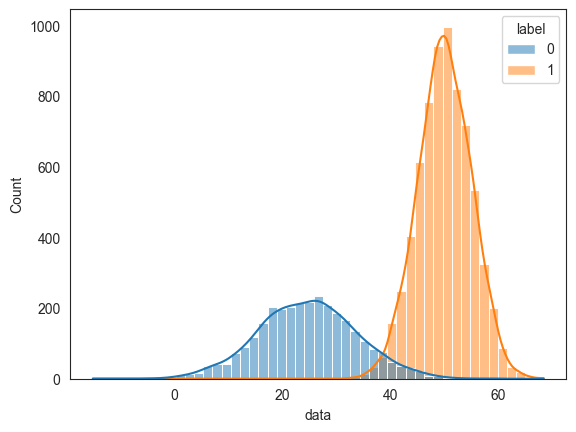

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import pandas as pd

mean_1=25
st_1=9
mean_2=50
st_2=5

n_dist_1 = np.random.normal(loc=mean_1, scale=st_1, size=3000)
n_dist_2 = np.random.normal(loc=mean_2, scale=st_2, size=7000)

dist_merged = np.hstack((n_dist_1, n_dist_2))

sns.set_style("white")
sns.histplot(data=dist_merged, kde=True)
plt.show()

dist_merged_res = dist_merged.reshape((len(dist_merged), 1))
gm_model = GaussianMixture(n_components=2, init_params='kmeans')
gm_model.fit(dist_merged_res)

print(f"Initial distribution means = {mean_1,mean_2}")
print(f"Initial distribution standard deviation = {st_1,st_2}")

print(f"GM_model distribution means = {gm_model.means_}")
print(f"GM_model distribution standard deviation = {np.sqrt(gm_model.covariances_)}")

dist_labels = gm_model.predict(dist_merged_res)

sns.set_style("white")
data_pred=pd.DataFrame({'data':dist_merged, 'label':dist_labels})
sns.histplot(data = data_pred, x = "data", kde = True, hue = "label")
plt.show()

label_0 = np.zeros(3000, dtype=int)
label_1 = np.ones(7000, dtype=int)
labels_merged = np.hstack((label_0, label_1))
data_init=pd.DataFrame({'data':dist_merged, 'label':labels_merged})

sns.set_style("white")
sns.histplot(data = data_init, x = "data", kde = True, hue = "label")
plt.show()

## **Simulated Annealing**

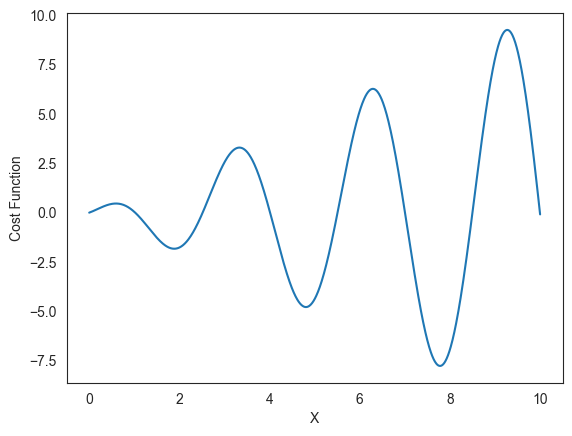

Iteration =  0 x_min =  8.352060345432603 Global Minimum = -2.549691087509061 Acceptance Probability = 1
Iteration =  1 x_min =  8.268146731695177 Global Minimum = -3.865265080181498 Acceptance Probability = 1.0011720530797679
Iteration =  2 x_min =  8.077074224781931 Global Minimum = -6.264757086553908 Acceptance Probability = 1.0013164397397474
Iteration =  4 x_min =  8.072960126990173 Global Minimum = -6.3053561226675905 Acceptance Probability = 0.9993874938212183
Iteration =  14 x_min =  8.057426141282635 Global Minimum = -6.45398523520768 Acceptance Probability = 1.0011249991583007
Iteration =  17 x_min =  7.908942504770391 Global Minimum = -7.482144101692382 Acceptance Probability = 0.9960707945643333
Iteration =  18 x_min =  7.805571271239743 Global Minimum = -7.755842336539771 Acceptance Probability = 1.0092963751415767
Iteration =  21 x_min =  7.767739570791674 Global Minimum = -7.763382995462104 Acceptance Probability = 1.0072493114830527
Iteration =  27 x_min =  7.7939618593

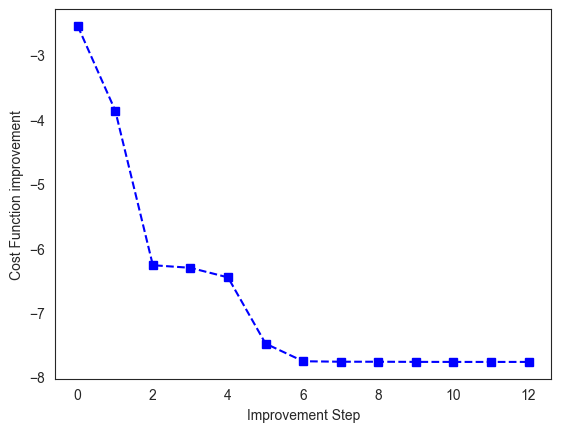

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x= np.linspace(0,10,1000)


def cost_function(x):
    return x*np.sin(2.1*x+1)

plt.plot(x,cost_function(x))
plt.xlabel('X')
plt.ylabel('Cost Function')
plt.show()

temp = 2000
iter = 2000
step_size = 0.1
np.random.seed(15)
xi = np.random.uniform(min(x), max(x))
E_xi = cost_function(xi)
xit, E_xit = xi, E_xi
cost_func_eval = []
acc_prob = 1

for i in range(iter):
        xstep = xit + np.random.randn() * step_size  
        E_step = cost_function(xstep)
        if E_step < E_xi:
            xi, E_xi = xstep, E_step
            cost_func_eval.append(E_xi)
            print('Iteration = ',i, 'x_min = ',xi,'Global Minimum =', E_xi,
                                     'Acceptance Probability =', acc_prob)
        diff_energy = E_step - E_xit
        t = temp /(i + 1)
        acc_prob = np.exp(-diff_energy/ t)
        if diff_energy < 0 or np.random.randn() < acc_prob:
            xit, E_xit = xstep, E_step


plt.plot(cost_func_eval, 'bs--')
plt.xlabel('Improvement Step')
plt.ylabel('Cost Function improvement')
plt.show()


## **Scipy Optimize**

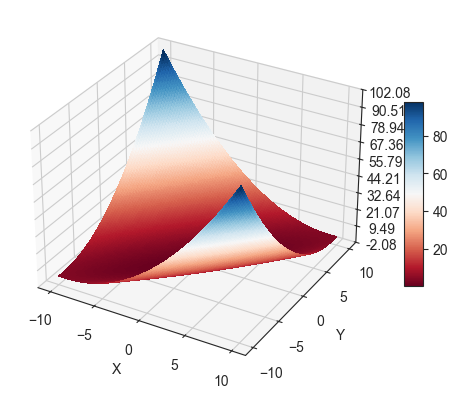

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 77
         Function evaluations: 147
[3.17941614e-09 3.64600127e-09]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 59
[-6.66133815e-14 -1.32338585e-13]


In [5]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

def matyas(x):
   return 0.26*(x[0]**2+x[1]**2)-0.48*x[0]*x[1]

#def booth(x):
#   return (x[0]+2*x[1]-7)**2+(2*x[0]+x[1]-5)**2

x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)
x, y = np.meshgrid(x, y)
z = matyas([x,y])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # use add_subplot instead of gca
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, 
                      cmap=cm.RdBu, linewidth=0, antialiased=False)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.show()

x0 = np.array([-10, 10])
NelderMeadOptimizeResults = minimize(matyas, x0, method='nelder-mead',
               options={'xatol': 1e-8, 'disp': True})

print(NelderMeadOptimizeResults.x)

x0 = np.array([-10, 10])
PowellOptimizeResults = minimize(matyas, x0, method='Powell',
               options={'xtol': 1e-8, 'disp': True})

print(PowellOptimizeResults.x)